# Google Data Analytics Case Study: Cyclistic  
### Author: Andrew Peters
#### Case Study Roadmap: Ask, prepare, process, analyze, share, act

# Ask:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

Statement: Our goal with this report is to determine the difference between member use and casual use. Why a Cyclistic user might stay a casual rider as opposed to becoming a member. And what can Cyclistic do in terms of social media and marketing to promote the annual membership. In short, how can Cyclistic increase annual membership.

# Prepare:
I will be using the fictional company Cyclistic's historical trip data from 2019 for analysis. 

(Note: The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study,
the datasets are appropriate and will enable you to answer the business questions. The data has been made available by
Motivate International Inc. under this [license](https://ride.divvybikes.com/data-license-agreement).)

Fortunately, the provided data meets the Google ROCCC standards.
It is reliable, original, comprehensive, current, and cited.

The data is available [here] (https://divvy-tripdata.s3.amazonaws.com/index.html)
* Divvy_Trips_2019_Q1.zip
* Divvy_Trips_2019_Q2.zip
* Divvy_Trips_2019_Q3.zip
* Divvy_Trips_2019_Q4.zip

# Process:
### Tools Used:
* Python
* Pandas

With such a large dataset a spreadsheet would not be as efficient as a programming language such as R or Python.
I will be using Python and its library pandas.
* After gathering relevant data, import pandas and read the quarterly CSV's
* To ensure data integrity I started with checking that data types were consistent, along with column names in each dataset.
* Seeing that 2019_Q2 had different column names, I renamed them to be consistent with the other quarters.
* I then merged the four quarterly data sets into one.
* To make double sure data types were consistent through the set, I iterated through each column checking the type.
    * Set dates to datetime, most integer fields were strings to begin with.
* Then 


In [47]:
#important imports of python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the quarterly csv's 
Q1 = pd.read_csv('Divvy_Trips_2019_Q1.csv',thousands=',')
Q2 = pd.read_csv('Divvy_Trips_2019_Q2.csv',thousands=',')
Q3 = pd.read_csv('Divvy_Trips_2019_Q3.csv',thousands=',')
Q4 = pd.read_csv('Divvy_Trips_2019_Q4.csv',thousands=',')

In [3]:
#Rename all of the columns in Q2 df to match Q1,Q3,Q4
Q2.rename(columns={'01 - Rental Details Rental ID':'trip_id', '01 - Rental Details Local Start Time':'start_time',
                   '01 - Rental Details Local End Time':'end_time', '01 - Rental Details Bike ID':'bikeid',
                   '01 - Rental Details Duration In Seconds Uncapped':'tripduration',
                   '03 - Rental Start Station ID':'from_station_id', '03 - Rental Start Station Name':'from_station_name',
                   '02 - Rental End Station ID': 'to_station_id', '02 - Rental End Station Name': 'to_station_name', 
                   'User Type' : 'usertype',
                   'Member Gender':'gender', '05 - Member Details Member Birthday Year': 'birthyear'},inplace=True)
Q2.columns

Index(['trip_id', 'start_time', 'end_time', 'bikeid', 'tripduration',
       'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'birthyear'],
      dtype='object')

In [4]:
#Now that the columns are named correctly we can combine them all into one dataframe.
data = pd.concat([Q1,Q2,Q3,Q4])
data.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,1783.0,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [60]:
#Convert datatypes
data['bikeid'] = pd.to_numeric(data['bikeid'])
data['start_time'] = pd.to_datetime(data['start_time'])
data['end_time' ]= pd.to_datetime(data['end_time'])
data['tripduration'] = pd.to_numeric(data['tripduration'])

#Add day of the week column
data['day_of_week']= data['start_time'].dt.dayofweek

#Adding a month column
data['month'] = data['start_time'].dt.month

#Age column
data['age'] = data['birthyear'].apply(lambda x: 2019 - x)
data.shape

(3769345, 15)

In [6]:
#Check that columns are the same data types.
for col_name, values in data.items():
    print(data[col_name].dtypes)

int64
datetime64[ns]
datetime64[ns]
int64
float64
int64
object
int64
object
object
object
float64
int64
int64
float64


In [7]:
# finding unique values in each column
n = pd.unique(data.usertype)
m = pd.unique(data.gender)
o = len(pd.unique(data.from_station_name))
p = len(pd.unique(data.to_station_name))
q = len(pd.unique(data.to_station_id))
r = len(pd.unique(data.from_station_id))
print(n,m,o,p,r,q)


['Subscriber' 'Customer'] ['Male' 'Female' nan] 640 641 616 617


# Analyze:
Now that the data has been put combined into one large set, the data types have been cast, and formatting is correct, analysis can begin.
* Number of Subscribers and normal Customers
    * Subscriber:     2909602
    * Customer:       859743
* Pivot tables
* Average ride length in minutes
    * Nearly 18 minutes
* Max/Min ride length in minutes
    * Longest: Almost 3 hours
    * Shortest: 1 minute
* Average ride length for Subscribers
    * 12.5 minutes
* Average ride length for non-Subscribers
    * 34.75 minutes
* Most common day of the week for riding
    * Wednesday
* Most popular season
    * Summer


In [8]:
#How many of each membership type?
num_of_members = data['usertype'].value_counts()
print(num_of_members)

Subscriber    2937367
Customer       880637
Name: usertype, dtype: int64


In [9]:
# Mode day of the week Monday = 0, Sunday = 6
mode_day_of_week = data['day_of_week'].mode()
print(mode_day_of_week) # Wednesday

0    3
dtype: int64


In [10]:
#Dropping outliers where tripduration was in the thousands of hours
indx = data.query('tripduration >= 10000')
data.drop(index=indx.index, inplace = True)

In [11]:
#Average ride Length in minutes
average_ride_len = data.tripduration.mean()
print(f'{average_ride_len/60 : .2f}', "minutes")

 17.61 minutes


In [12]:
#Longest and shortest rides in minutes between both casual and annual members
max_ride_len = data.tripduration.max()
min_ride_len = data.tripduration.min()

print("Longest ride duration:", f'{max_ride_len/60 : .2f}', "minutes",
"\nShortest ride duration: ",f'{min_ride_len/60 : .2f}',"minutes")

Longest ride duration:  166.65 minutes 
Shortest ride duration:   1.02 minutes


In [13]:
# Pivot Table showing average trip duration in seconds by customer type
data.pivot_table(index='usertype',values='tripduration',aggfunc='mean')

,tripduration
usertype,
Customer,2086.196782
Subscriber,752.548051


In [76]:
# Pivot table showing average ride length for users by day of the week in seconds
avg_ride_length_table = data.pivot_table(index='usertype',columns='day_of_week',
                 values='tripduration',aggfunc='mean')

# Pivot table in minutes
avg_ride_length_table/60

day_of_week,0,1,2,3,4,5,6
usertype,,,,,,,
Customer,34.971126,32.662445,32.186216,32.439812,33.833673,37.064042,36.359816
Subscriber,12.274689,12.238297,12.275701,12.264376,12.163282,13.923410,13.781697


In [86]:
data.pivot_table(index='usertype', columns='day_of_week',
                                       values='trip_id', aggfunc='count')


day_of_week,0,1,2,3,4,5,6
usertype,,,,,,,
Customer,99103,86552,87615,98926,118321,203223,166003
Subscriber,454327,492389,489273,482306,452738,284642,253927


In [15]:
#Pivot table showing rentals per month
data.pivot_table(index='usertype',columns='month',values='trip_id', aggfunc='count')

month,1,2,3,4,5,6,7,8,9,10,11,12
usertype,,,,,,,,,,,,
Customer,4485,2555,15488,46496,79582,127326,171133,182539,127148,68972,18120,15899
Subscriber,97022,92142,147637,214519,282754,342518,377879,400649,363810,296982,156726,136964


In [42]:
#What was the average ride length of both casual and members in minutes?
riders = data.groupby('usertype')['tripduration'].mean()
print(riders/60)

usertype
Customer      34.769946
Subscriber    12.542468
Name: tripduration, dtype: float64


In [17]:
# What is the average,min,max,mode age for rider
age_avg = data.groupby('usertype')['age'].mean()
age_min = data.groupby('usertype')['age'].min()
age_max = data.groupby('usertype')['age'].max()
age_mode = data.groupby('usertype')['age'].agg(pd.Series.mode)
print(age_avg,age_max,age_min,age_mode)

usertype
Customer      30.929120
Subscriber    35.395264
Name: age, dtype: float64 usertype
Customer      260.0
Subscriber    131.0
Name: age, dtype: float64 usertype
Customer      16.0
Subscriber     5.0
Name: age, dtype: float64 usertype
Customer      25.0
Subscriber    27.0
Name: age, dtype: float64


In [46]:
#Checking how often Customers and Subscribers use the same stations from start to end
# Group the original DataFrame by usertype and the two station IDs
grouped_data = data.groupby(['usertype', 'from_station_id', 'to_station_id'])['trip_id'].count().reset_index()

# Pivot the result
pivot_table = grouped_data.pivot_table(values='trip_id', index=['from_station_id', 'to_station_id'], columns='usertype', fill_value=0)

# Sort the pivot table by the total number of trips in descending order
sorted_pivot = pivot_table.sum(axis=1).sort_values(ascending=False).index
pivot_table = pivot_table.loc[sorted_pivot]

# Display the top 10 occurrences for each user type
for usertype in pivot_table.columns:
    print(f"Top 10 occurrences for {usertype}:")
    top_occurrences = pivot_table[usertype].nlargest(10)
    print(top_occurrences)
    print()

Top 10 occurrences for Customer:
from_station_id  to_station_id
76               35               9213
35               35               8387
76               76               7890
85               85               4845
3                35               3485
35               90               3108
                 76               2848
90               35               2833
                 90               2824
6                35               2510
Name: Customer, dtype: int64

Top 10 occurrences for Subscriber:
from_station_id  to_station_id
192              43               3496
43               91               2755
195              91               2614
43               192              2518
174              43               2310
91               43               2213
195              44               2164
18               43               2099
195              192              2099
237              148              1986
Name: Subscriber, dtype: int64



# Share:
### Key tasks 
    * Create effective visualizations
    * Present findings
    * Ensure accessibility

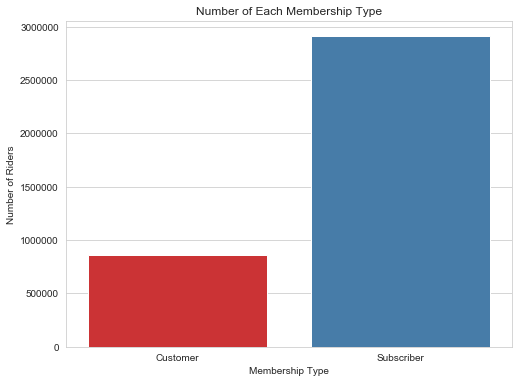

In [84]:
num_of_members = data['usertype'].value_counts()

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=num_of_members.index, y=num_of_members.values, palette="Set1", ax=ax)
ax.set_title("Number of Each Membership Type")
ax.set_xlabel("Membership Type")
ax.set_ylabel("Number of Riders")
plt.show()

### From the heatmap below we can determine
* Subscribers are much more likely to make trips between different stations
* Customers tend to rent a bike and return it to the same station

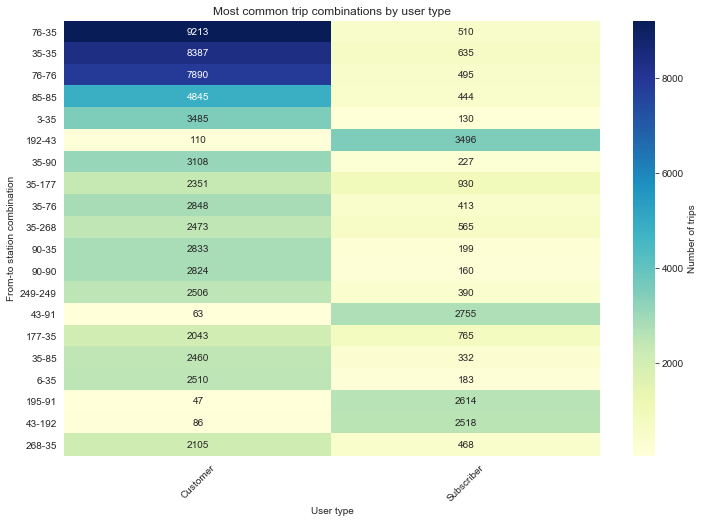

In [54]:
# Set the plot style
sns.set_style('whitegrid')

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(pivot_table.head(20), cmap='YlGnBu', annot=True, fmt='d', cbar_kws={'label': 'Number of trips'}, ax=ax)

# Set the plot title and axis labels
ax.set_title('Most common trip combinations by user type')
ax.set_xlabel('User type')
ax.set_ylabel('From-to station combination')

# Rotate the x-axis tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

### From the bar graph below we see the average ride length by User type
*  On average Subscriber ride length is around 13 minutes 
*  On average Customers ride length is more than double Subscriber ride length at 35 minutes

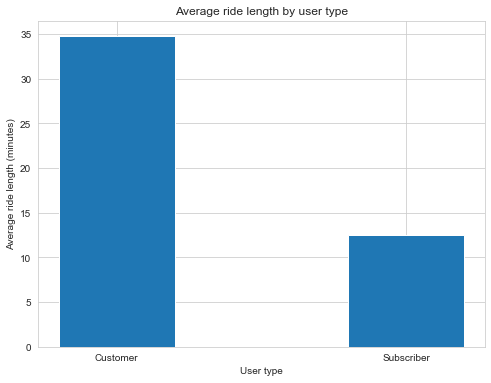

In [61]:
# Calculate the average ride length in minutes for each user type
riders = data.groupby('usertype')['tripduration'].mean() / 60

# Create a bar chart of the ride lengths
fig, ax = plt.subplots(figsize=(8, 6))
x = riders.index
bar_width = 0.4

ax.bar(x, riders.values, width=bar_width)

# Add axis labels and title
ax.set_xlabel('User type')
ax.set_ylabel('Average ride length (minutes)')
ax.set_title('Average ride length by user type')

# Display the plot
plt.show()

### The heat map shows bike rentals by month
* Summer months are more popular for both User Types

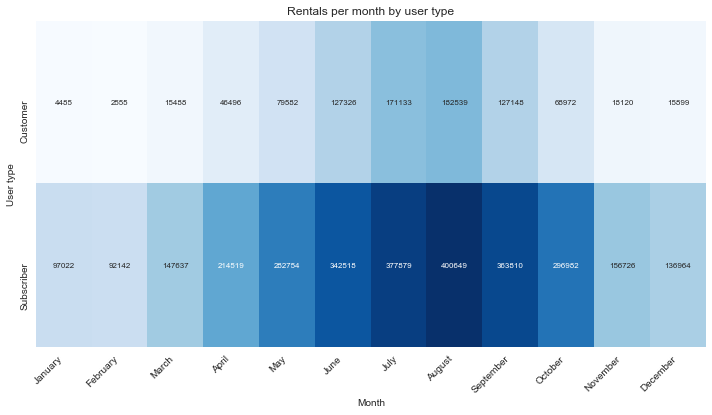

In [73]:

# Create a dictionary to map month numbers to names
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


# Create the pivot table
rentals_per_month = data.pivot_table(index='usertype', columns='month', values='trip_id', aggfunc='count')

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(rentals_per_month, cmap='Blues', annot=True, fmt='d', cbar=False, annot_kws={'fontsize':8})

# Set the x-axis tick labels to be the month names
ax.set_xticklabels(list(month_names.values()), rotation=45, ha='right')

# Add axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('User type')
ax.set_title('Rentals per month by user type')

# Display the plot
plt.show()

### This line chart shows the average ride lengt on each day of the week
* Customers are more likely to ride longer on the weekends
* Subscribers average the same ride time for weekdays
* Subscribers average longer rides on weekends

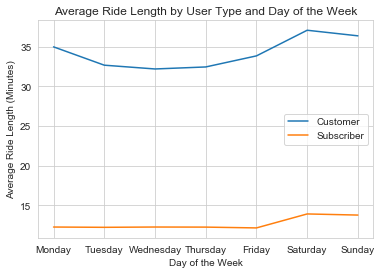

In [82]:
# Create the pivot table with average ride length in minutes
avg_ride_length_table = data.pivot_table(index='usertype', columns='day_of_week', values='tripduration', aggfunc='mean')/60

# Create a line plot for each user type
for user_type in avg_ride_length_table.index:
    plt.plot(avg_ride_length_table.loc[user_type], label=user_type)
    
# Change the x-axis labels
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                      'Saturday', 'Sunday'])

# Set the plot title and axis labels
plt.title('Average Ride Length by User Type and Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Ride Length (Minutes)')

# Add a legend
plt.legend()

# Show the plot
plt.show()

### This line chart shows the number of rides per day of the week
* Subscribers use bikes significantly more on weekdays
* Customers use bike significantly more on weekends

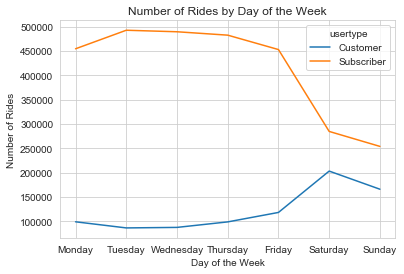

In [90]:
# Pivot table showing number of rides for users by day of the week
num_rides_table = data.pivot_table(index='usertype',columns='day_of_week',
                                   values='trip_id',aggfunc='count')

# Create a line chart
num_rides_table.T.plot(kind='line')

# Change the x-axis labels
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                      'Saturday', 'Sunday'])

# Set the chart title and axis labels
plt.title('Number of Rides by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')

# Show the chart
plt.show()

# Act:

Based on the findings, there are several recommendations that the marketing team could consider to maximize subscribers, especially converting casual riders to annual subscribers:

* Offer promotions to casual riders to encourage them to become subscribers. For example, provide discounts on annual subscriptions, or offer a free month trial to entice them to commit to a membership.

* Increase marketing efforts during the summer months when bike rentals are more popular. This can include targeted ads on digital media platforms, such as social media and Google Ads, as well as collaborations with popular tourism websites or travel bloggers to increase brand awareness.

* Offer incentives to encourage subscribers to ride more on weekends, such as bonus points or discounts on future rentals for weekend rides.

* Emphasize the convenience of returning the bike to the station it was rented from, as this is a preference for many customers. This could be promoted through targeted social media ads or through email marketing campaigns.

In addition to these recommendations, it is important to consider why casual riders would buy a membership. One reason is that the cost per ride is much lower with a membership compared to individual rentals, making it a cost-effective option for frequent riders. Additionally, subscribers have access to benefits such as faster checkouts and free rentals after a certain number of rides, which can be appealing to riders who use the service frequently.

Overall, by targeting digital media marketing efforts, providing incentives for weekend rides, and emphasizing the benefits of a membership, the company can increase its number of subscribers and overall revenue.
    
